In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [4]:
data_dir = r"E:\photovoltaic_defect\othertypes_PVELAD"
img_height,img_width=180,180
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16510 files belonging to 4 classes.
Using 13208 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16510 files belonging to 4 classes.
Using 3302 files for validation.


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Adjust output based on defect classes
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,655,492 (25.39 MB)

 Trainable params: 6,655,492 (25.39 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=12
)

# Save the trained model
model.save("cnn_model.h5")

Epoch 1/12
413/413 ━━━━━━━━━━━━━━━━━━━━ 96s 229ms/step - accuracy: 0.9001 - loss: 3.6788 - val_accuracy: 0.9903 - val_loss: 0.0439
Epoch 2/12
413/413 ━━━━━━━━━━━━━━━━━━━━ 66s 160ms/step - accuracy: 0.9845 - loss: 0.0860 - val_accuracy: 0.9891 - val_loss: 0.0518
Epoch 3/12
413/413 ━━━━━━━━━━━━━━━━━━━━ 67s 163ms/step - accuracy: 0.9866 - loss: 0.0557 - val_accuracy: 0.9921 - val_loss: 0.0325
Epoch 4/12
413/413 ━━━━━━━━━━━━━━━━━━━━ 73s 176ms/step - accuracy: 0.9889 - loss: 0.0520 - val_accuracy: 0.9909 - val_loss: 0.0383
Epoch 5/12
413/413 ━━━━━━━━━━━━━━━━━━━━ 68s 164ms/step - accuracy: 0.9889 - loss: 0.0414 - val_accuracy: 0.9918 - val_loss: 0.0326
Epoch 6/12
413/413 ━━━━━━━━━━━━━━━━━━━━ 66s 161ms/step - accuracy: 0.9912 - loss: 0.0358 - val_accuracy: 0.9876 - val_loss: 0.0619
Epoch 7/12
413/413 ━━━━━━━━━━━━━━━━━━━━ 66s 161ms/step - accuracy: 0.9898 - loss: 0.0377 - val_accuracy: 0.9912 - val_loss: 0.0327
Epoch 8/12
413/413 ━━━━━━━━━━━━━━━━━━━━ 66s 160ms/step - accuracy: 0.9904 - loss: 0

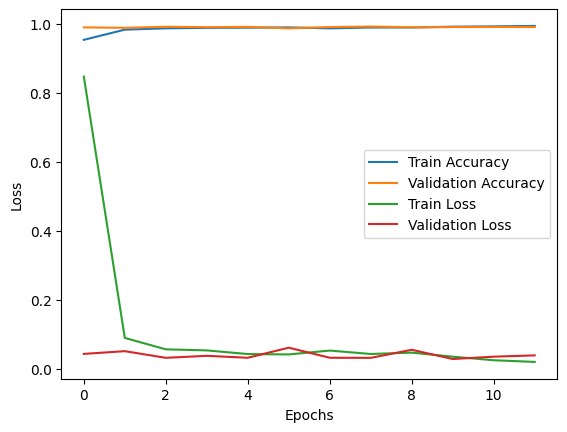

In [1]:
##Saving history to plot train, validation acc,loss curve
import pickle
import matplotlib.pyplot as plt
#with open('cnn_history.pkl', 'wb') as f:
    #pickle.dump(history.history, f)
with open('cnn_history.pkl','rb') as f:
    history= pickle.load(f)

plt.plot(history['accuracy'],label='Train Accuracy')
plt.plot(history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.plot(history['loss'],label='Train Loss')
plt.plot(history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN Acc Loss.png', dpi=300)


In [6]:
from tensorflow.keras.models import load_model
try:
    saved_model = load_model('cnn_model.h5')
    print("Model loaded successfully!")
    saved_model.summary()
    loss, accuracy = saved_model.evaluate(train_ds)
    print(f'Validation Accuracy: {accuracy}')
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,655,494 (25.39 MB)

 Trainable params: 6,655,492 (25.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

413/413 ━━━━━━━━━━━━━━━━━━━━ 86s 208ms/step - accuracy: 0.9940 - loss: 0.0249
Validation Accuracy: 0.9944730401039124


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import seaborn as sns 

In [8]:
y_pred,y_true=[],[]
for image,label in val_ds:
    prediction = saved_model.predict(image)
    y_true.extend(label.numpy())
    y_pred.extend(np.argmax(prediction,axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

C:\Users\Admin\AppData\Local\Temp\ipykernel_10712\2042771017.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


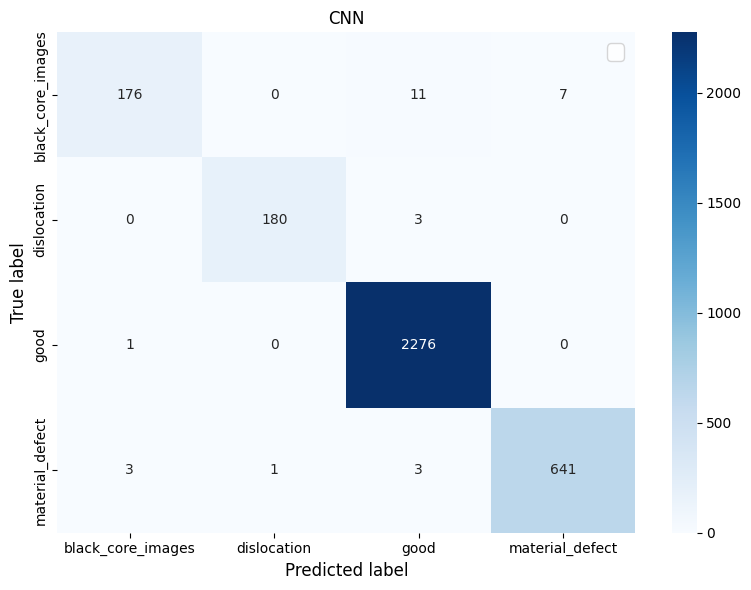

In [9]:
cm = confusion_matrix(y_true,y_pred)
class_names = train_ds.class_names
plt.figure(figsize=(8,6))
plt.legend(fontsize=16)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)

plt.xlabel('Predicted label',fontsize=12)
plt.ylabel('True label',fontsize=12)
plt.title("CNN")

plt.tight_layout()
plt.savefig('CNN confusion matrix.png', dpi=300)
plt.show()


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix,log_loss, roc_auc_score, matthews_corrcoef, cohen_kappa_score
from collections import defaultdict
print("--- Confusion Matrix ---")
print(cm)
print(f"Total Samples: {np.sum(cm)}")
print("-" * 50)

# --- 3. Compute Per-Class Metrics ---
print("--- Per-Class Metrics ---")

per_class_details = defaultdict(dict) # To store TP, FP, FN, TN for each class
per_class_metrics = defaultdict(list) # To store Sensitivity, Specificity, etc. for averaging


n_classes = cm.shape[0]
total_samples = np.sum(cm)

for i in range(n_classes):
    class_label = f"Class {i}"

    # Calculate TP, FP, FN, TN for the current class (i)
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP # Sum of column i (predicted as class i) minus TP
    FN = np.sum(cm[i, :]) - TP # Sum of row i (actual class i) minus TP
    TN = total_samples - (TP + FP + FN) # All samples minus those in the current class's row/col

    per_class_details[class_label]['TP'] = TP
    per_class_details[class_label]['FP'] = FP
    per_class_details[class_label]['FN'] = FN
    per_class_details[class_label]['TN'] = TN

    # Calculate Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0.0
    per_class_metrics['Sensitivity'].append(sensitivity)

    # Calculate Specificity
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0.0
    per_class_metrics['Specificity'].append(specificity)

    # Calculate Precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
    per_class_metrics['Precision'].append(precision)

    # Calculate F1-Score
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0.0
    per_class_metrics['F1-Score'].append(f1_score)

    print(f"\n{class_label}:")
    print(f"  TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
    print(f"  Sensitivity (Recall): {sensitivity:.4f}")
    print(f"  Specificity:          {specificity:.4f}")
    print(f"  Precision:            {precision:.4f}")
    print(f"  F1-Score:             {f1_score:.4f}")
    print(f"  Support (Actual):     {np.sum(cm[i, :])}") # Support is SumRow_i

print("-" * 50)

# --- 4. Compute Averaged Metrics ---
print("--- Averaged Metrics ---")

# Supports are the row sums of the confusion matrix
class_supports = np.sum(cm, axis=1)

# Macro-Averaging
macro_sensitivity = np.mean(per_class_metrics['Sensitivity'])
macro_specificity = np.mean(per_class_metrics['Specificity'])
macro_precision = np.mean(per_class_metrics['Precision'])
macro_f1_score = np.mean(per_class_metrics['F1-Score'])

print(f"\nMacro-averaged Sensitivity: {macro_sensitivity:.4f}")
print(f"Macro-averaged Specificity: {macro_specificity:.4f}")
print(f"Macro-averaged Precision:   {macro_precision:.4f}")
print(f"Macro-averaged F1-Score:    {macro_f1_score:.4f}")

# Weighted-Averaging
weighted_sensitivity = np.average(per_class_metrics['Sensitivity'], weights=class_supports)
weighted_specificity = np.average(per_class_metrics['Specificity'], weights=class_supports)
weighted_precision = np.average(per_class_metrics['Precision'], weights=class_supports)
weighted_f1_score = np.average(per_class_metrics['F1-Score'], weights=class_supports)

print(f"\nWeighted-averaged Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted-averaged Specificity: {weighted_specificity:.4f}")
print(f"Weighted-averaged Precision:   {weighted_precision:.4f}")
print(f"Weighted-averaged F1-Score:    {weighted_f1_score:.4f}")

# Micro-Averaging (equivalent to overall accuracy)
# Sum of diagonals is total correct predictions
micro_TP = np.trace(cm)
# Sum of all non-diagonal elements represents total misclassifications
micro_FP_FN = np.sum(cm) - micro_TP

# For micro-averaging in multi-class, micro-precision = micro-recall = micro-f1 = overall accuracy
overall_accuracy = micro_TP / total_samples

print(f"\nMicro-averaged Precision (Overall Accuracy): {overall_accuracy:.4f}")
print(f"Micro-averaged Recall (Overall Accuracy):    {overall_accuracy:.4f}")
print(f"Micro-averaged F1-Score (Overall Accuracy):  {overall_accuracy:.4f}")
print(f"Overall Accuracy (direct from CM):           {overall_accuracy:.4f}")

# --- 5. Matthews Correlation Coefficient (MCC) ---
# MCC requires y_true and y_pred (not just the confusion matrix)
mcc = matthews_corrcoef(y_true, y_pred)
print(f"\n--- Matthews Correlation Coefficient (MCC) ---")
print(f"MCC: {mcc:.4f}")

# --- 6. Cohen's Kappa Score ---
# Kappa also requires y_true and y_pred
kappa = cohen_kappa_score(y_true, y_pred)
print(f"\n--- Cohen's Kappa Score ---")
print(f"Kappa: {kappa:.4f}")


--- Confusion Matrix ---
[[ 176    0   11    7]
 [   0  180    3    0]
 [   1    0 2276    0]
 [   3    1    3  641]]
Total Samples: 3302
--------------------------------------------------
--- Per-Class Metrics ---

Class 0:
  TP: 176, FP: 4, FN: 18, TN: 3104
  Sensitivity (Recall): 0.9072
  Specificity:          0.9987
  Precision:            0.9778
  F1-Score:             0.9412
  Support (Actual):     194

Class 1:
  TP: 180, FP: 1, FN: 3, TN: 3118
  Sensitivity (Recall): 0.9836
  Specificity:          0.9997
  Precision:            0.9945
  F1-Score:             0.9890
  Support (Actual):     183

Class 2:
  TP: 2276, FP: 17, FN: 1, TN: 1008
  Sensitivity (Recall): 0.9996
  Specificity:          0.9834
  Precision:            0.9926
  F1-Score:             0.9961
  Support (Actual):     2277

Class 3:
  TP: 641, FP: 7, FN: 7, TN: 2647
  Sensitivity (Recall): 0.9892
  Specificity:          0.9974
  Precision:            0.9892
  F1-Score:             0.9892
  Support (Actual):     6

In [11]:
print(classification_report(y_true, y_pred,target_names=class_names))

                   precision    recall  f1-score   support

black_core_images       0.98      0.91      0.94       194
      dislocation       0.99      0.98      0.99       183
             good       0.99      1.00      1.00      2277
  material_defect       0.99      0.99      0.99       648

         accuracy                           0.99      3302
        macro avg       0.99      0.97      0.98      3302
     weighted avg       0.99      0.99      0.99      3302



In [12]:
from tensorflow.keras.utils import to_categorical
y_true_list = []
y_pred_proba_list = []

# Iterate through the validation dataset
for images, labels in val_ds:
    # Get the model's prediction (probabilities)
    prediction_probabilities = saved_model.predict(images)
    # Extend the true labels list
    y_true_list.extend(labels.numpy())
    # Extend the predicted probabilities list
    y_pred_proba_list.extend(prediction_probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

Shape of predicted probabilities (y_pred_proba): (3302, 4)
Sample of predicted probabilities:
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [2.3225326e-09 3.8831452e-08 1.0000000e+00 8.8223283e-12]
 [1.6884172e-09 2.4175048e-08 1.0000000e+00 4.3220896e-12]]
--------------------------------------------------

--- ROC AUC Scores ---
Micro-average ROC AUC: 0.9996
Macro-average ROC AUC: 0.9986
ROC AUC for Class 0: 0.9970
ROC AUC for Class 1: 0.9979
ROC AUC for Class 2: 0.9992
ROC AUC for Class 3: 0.9998
--------------------------------------------------


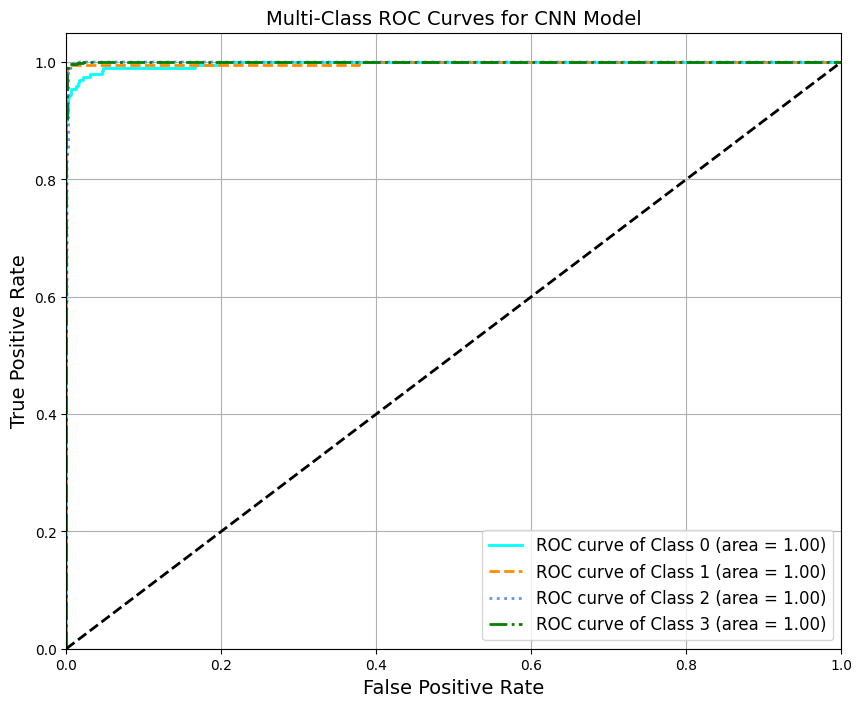

In [13]:
from sklearn.metrics import roc_curve, auc
# Convert lists to NumPy arrays
y_true = np.array(y_true_list)
y_pred_proba = np.array(y_pred_proba_list)

# Get the predicted class indices for the confusion matrix and other metrics
y_pred = np.argmax(y_pred_proba, axis=1)

# One-hot encode the true labels for ROC AUC calculation
# Use the number of classes from the model's output layer or class_names
num_classes = len(class_names) # Assuming class_names is available and correct
y_true_one_hot = to_categorical(y_true, num_classes=num_classes)


# Verify the shape of predictions (now a NumPy array)
print(f"Shape of predicted probabilities (y_pred_proba): {y_pred_proba.shape}")
print(f"Sample of predicted probabilities:\n {y_pred_proba[:3]}")
print("-" * 50)

# --- 5. Prepare True Labels for ROC AUC ---
# y_true_one_hot is prepared above using to_categorical.

# --- 6. Calculate ROC Curve Points and AUC for each class (One-vs-Rest) ---
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate for each class
for i in range(num_classes): # Use num_classes here
    # For each class, treat it as positive (1) and all others as negative (0)
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate Micro-average ROC AUC
# The micro-average ROC curve is computed by pooling all true positives, false positives,
# and true negatives across all classes.
fpr_micro, tpr_micro, _ = roc_curve(y_true_one_hot.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Calculate Macro-average ROC AUC (average of individual AUCs)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)])) # Use num_classes
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes): # Use num_classes
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes # Use num_classes
roc_auc_macro = auc(all_fpr, mean_tpr)


print("\n--- ROC AUC Scores ---")
print(f"Micro-average ROC AUC: {roc_auc_micro:.4f}")
print(f"Macro-average ROC AUC: {roc_auc_macro:.4f}")
for i in range(num_classes): # Use num_classes
    print(f"ROC AUC for Class {i}: {roc_auc[i]:.4f}")
print("-" * 50)

# --- 7. Plotting the ROC Curves ---
plt.figure(figsize=(10, 8))
'''
# Plot Micro-average ROC curve
plt.plot(fpr_micro, tpr_micro,
         label=f'Micro-average ROC curve (area = {roc_auc_micro:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot Macro-average ROC curve
plt.plot(all_fpr, mean_tpr,
         label=f'Macro-average ROC curve (area = {roc_auc_macro:.2f})',
         color='navy', linestyle=':', linewidth=4)
'''
# Plot individual ROC curves for each class
line_styles = ['-', '--', ':', '-.'] # Solid, dashed, dotted, dash-dot

colors = ['aqua', 'darkorange', 'cornflowerblue', 'green'] # Define colors for 4 classes
# Ensure there are enough colors for the number of classes
if len(colors) < num_classes:
    # You might need a more sophisticated color scheme if you have many classes
    print("Warning: Not enough colors defined for all classes. Using default matplotlib colors.")
    colors = plt.cm.get_cmap('tab10', num_classes) # Example: use a colormap


for i in range(num_classes): # Use num_classes
    color_to_use = colors[i] if len(colors) == num_classes else colors(i) # Handle colormap case
    plt.plot(fpr[i], tpr[i], color=color_to_use, lw=2, linestyle=line_styles[i % len(line_styles)],
             label=f'ROC curve of Class {i} (area = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], 'k--', lw=2) # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('Multi-Class ROC Curves for CNN Model',fontsize=14)
plt.legend(loc="lower right")
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('CNN ROC.png', dpi=300)
plt.show()